# ANALYSIS OF INTERNET ACCESS IN SÃO PAULO METROPOLITAN REGION OVER 2015-2020

SUMMARY

1. [WEBSCRAPING GOVERN WEBSITE WITH SELENIUM](#WEBSCRAPING-GOVERN-WEBSITE-WITH-SELENIUM)
2. [EXPLORATORY DATA ANALYSIS](#EXPLORATORY-DATA-ANALYSIS)
3. [IMPORT DATA](#IMPORT-DATA)
4. [DATAFRAME MANIPULATION](#DATAFRAME-MANIPULATION)
5. [DISCRETE VARIABLE ANALYSIS](#DISCRETE-VARIABLE-ANALYSIS)
6. [CATEGORICAL VARIABLE ANALYSIS](#CATEGORICAL-VARIABLE-ANALYSIS)
7. [HYPOTHESIS TESTING](#HYPOTHESIS-TESTING)
8. [HEATMAP](#HEATMAP)
9. [DECISION TREE MODELING](#DECISION-TREE-MODELING)
10. [OPERATIONAL KEY PERFORMANCE INDEX ANALYSIS](#OPERATIONAL-KEY-PERFORMANCE-INDEX-ANALYSIS)

# WEBSCRAPING GOVERN WEBSITE WITH SELENIUM

In [1]:
#Import webdriver and keys from selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [2]:
#open a new Firefox browser. 
#don't forget to specify the path of the executable path as below
browser = webdriver.Firefox(executable_path=r'C://Webdriver/bin/geckodriver.exe')

#load the url homepage and stop the jupyter for 10s in order to complete the loading of the page
browser.get('https://dados.gov.br/dataset')
import time
time.sleep(10)

In [3]:
# Find the search box 
element = browser.find_element_by_xpath("//*[@id='dataset-search-form']/div[1]")
element.click()

#verify that "dados" is the title of the homepage
assert 'dados' in browser.title

#prepare the search box to find a specific word. 
elem = browser.find_element_by_name("q")

#clear the search box 
elem.clear()
#write the keyword to find and ask the search box to return the elements with the keyword
elem.send_keys("Multimídia")
elem.send_keys(Keys.RETURN)

In [4]:
#select the format of the element of interest. here the element selected is "Acesso de Comunicacao Multimídia" in csv format
element = browser.find_element_by_xpath("//*[@id='content']/div[3]/div/section[1]/div/ul/li[1]/ul/li[1]/a")
element.click()

In [5]:
#select explore option
element1 = browser.find_element_by_xpath("//*[@id='dataset-resources']/ul/li[1]/div")
element1.click()

In [6]:
#select "ir para recursos" to download the zip file
element2 = browser.find_element_by_xpath("//*[@id='dataset-resources']/ul/li[1]/div/ul/li[2]/a")
element2.click()

# EXPLORATORY DATA ANALYSIS

In [156]:
#Import libraries to manipulate the data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from scipy.stats import ttest_ind
import scipy.stats as stats
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder

# IMPORT DATA

Import data from 2015-2020 period

In [157]:
acesso_2016 = pd.read_csv("Acessos_Banda_Larga_Fixa_2015-2016.csv", sep = ';', error_bad_lines = False)
acesso_2018 = pd.read_csv("Acessos_Banda_Larga_Fixa_2017-2018.csv", sep = ';', error_bad_lines = False)
acesso_2020 = pd.read_csv("Acessos_Banda_Larga_Fixa_2019-2020.csv", sep = ';', error_bad_lines = False)


In [4]:
#inspect all the columns
acesso_2020.columns

Index(['Ano', 'Mês', 'Grupo Econômico', 'Empresa', 'CNPJ',
       'Porte da Prestadora', 'UF', 'Município', 'Código IBGE Município',
       'Faixa de Velocidade', 'Tecnologia', 'Meio de Acesso', 'Acessos'],
      dtype='object')

In [5]:
# inspect the size of companies

acesso_2020['Porte da Prestadora'].unique()

array(['Pequeno Porte', 'Grande Porte'], dtype=object)

In [158]:
#define a function to drop the samll size companies and all states, except São Paulo state 

def porte(dataframe, column1, column2):
    porte = dataframe.copy()
    porte = porte.drop(porte[(porte['Porte da Prestadora'] != column1) | (porte['UF'] != column2)].index)
    return porte

In [159]:
acesso_2016_sp = porte(acesso_2016, 'Grande Porte', 'SP')
acesso_2018_sp = porte(acesso_2018, 'Grande Porte', 'SP')
acesso_2020_sp = porte(acesso_2020, 'Grande Porte', 'SP')

# DATAFRAME MANIPULATION

In [160]:
#Concatenate the three dataframes together

acesso = [acesso_2016_sp, acesso_2018_sp, acesso_2020_sp]
acesso_sp = pd.concat(acesso)

In [9]:
#inspect the columns of the dataframe created

acesso_sp.columns

Index(['Ano', 'Mês', 'Grupo Econômico', 'Empresa', 'CNPJ',
       'Porte da Prestadora', 'UF', 'Município', 'Código IBGE Município',
       'Faixa de Velocidade', 'Tecnologia', 'Meio de Acesso', 'Acessos'],
      dtype='object')

In [161]:
#Dropping the unnecessary columns and create a new dataframe

drop_acesso = acesso_sp.drop(columns=['Grupo Econômico', 'CNPJ', 'UF', 'Porte da Prestadora', 'Código IBGE Município', 'Meio de Acesso'])

In [11]:
#inspect the shape

drop_acesso.shape

(672595, 7)

In [13]:
# Find the number of rows containing duplicated values

duplicate_rows = drop_acesso[drop_acesso.duplicated()]
print('Number of duplicate rows: ', len(duplicate_rows))

Number of duplicate rows:  3096


In [266]:
#drop duplicated columns

drop_duplit = drop_acesso.drop_duplicates()

In [267]:
drop_duplit

,Ano,Mês,Empresa,Município,Faixa de Velocidade,Tecnologia,Acessos
24967,2016,12,VIVO,Santo Anastácio,0Kbps a 512Kbps,ATM,13
26161,2016,12,VIVO,São Caetano do Sul,512kbps a 2Mbps,Fibra,13
26162,2016,12,VIVO,Pacaembu,512kbps a 2Mbps,xDSL,617
26163,2016,12,VIVO,Campinas,12Mbps a 34Mbps,xDSL,19407
26164,2016,12,VIVO,Estiva Gerbi,512kbps a 2Mbps,ATM,4
...,...,...,...,...,...,...,...
3606829,2019,1,OI,Osasco,0Kbps a 512Kbps,FR,4
3606835,2019,1,OI,Barueri,0Kbps a 512Kbps,FR,6
3606840,2019,1,OI,Cotia,0Kbps a 512Kbps,FR,1
3606842,2019,1,OI,Guarulhos,512kbps a 2Mbps,FR,1


In [268]:
#sort by Ano and Mês

drop_duplit = drop_duplit.sort_values(by=['Ano', 'Mês'])

In [269]:
drop_duplit

,Ano,Mês,Empresa,Município,Faixa de Velocidade,Tecnologia,Acessos
2371895,2015,1,VIVO,São Paulo,2Mbps a 12Mbps,ETHERNET,4
2371923,2015,1,OI,São João da Boa Vista,512kbps a 2Mbps,xDSL,1
2372137,2015,1,VIVO,São Paulo,> 34Mbps,Fibra,152
2372212,2015,1,CLARO,Osasco,0Kbps a 512Kbps,Fibra,1
2374073,2015,1,CLARO,Cotia,512kbps a 2Mbps,Fibra,1
...,...,...,...,...,...,...,...
146587,2020,12,SKY/AT&T,Guarujá,2Mbps a 12Mbps,LTE,362
146590,2020,12,SKY/AT&T,Ibiúna,12Mbps a 34Mbps,LTE,5
146608,2020,12,SKY/AT&T,Tietê,2Mbps a 12Mbps,LTE,26
146610,2020,12,SKY/AT&T,Santos,2Mbps a 12Mbps,LTE,406


Select only the metropolitan regions of SP

In [271]:
drop_duplit = drop_duplit.drop(drop_duplit[(drop_duplit['Município'] != 'São Paulo') & (drop_duplit['Município'] != 'Campinas') & (drop_duplit['Município'] != 'São José dos Campos') & (drop_duplit['Município'] != 'Sorocaba') & (drop_duplit['Município'] != 'Santos') & (drop_duplit['Município'] != 'Ribeirão Preto')].index)

In [272]:
drop_duplit['Município'].unique()

array(['São Paulo', 'Santos', 'Campinas', 'São José dos Campos',
       'Ribeirão Preto', 'Sorocaba'], dtype=object)

In [273]:
#Find which company has the most acessos and identify the tecnologia linked
drop_duplit[drop_duplit['Acessos'] == drop_duplit['Acessos'].max()]

,Ano,Mês,Empresa,Município,Faixa de Velocidade,Tecnologia,Acessos
98485,2020,12,CLARO,São Paulo,> 34Mbps,HFC,1224902


In [274]:
#Find which company has the least acessos and identify the tecnologia linked
drop_duplit[drop_duplit['Acessos'] == drop_duplit['Acessos'].min()]

,Ano,Mês,Empresa,Município,Faixa de Velocidade,Tecnologia,Acessos
2374075,2015,1,CLARO,Santos,512kbps a 2Mbps,xDSL,1
2374080,2015,1,CLARO,Campinas,0Kbps a 512Kbps,xDSL,1
2374084,2015,1,CLARO,Santos,0Kbps a 512Kbps,Fibra,1
2374160,2015,1,CLARO,São José dos Campos,0Kbps a 512Kbps,xDSL,1
2374170,2015,1,CLARO,São José dos Campos,512kbps a 2Mbps,Fibra,1
...,...,...,...,...,...,...,...
94076,2020,12,CLARO,Santos,> 34Mbps,Wi-Fi,1
94500,2020,12,CLARO,Sorocaba,0Kbps a 512Kbps,Wi-Fi,1
97817,2020,12,CLARO,Campinas,2Mbps a 12Mbps,Wi-Fi,1
99830,2020,12,CLARO,São José dos Campos,2Mbps a 12Mbps,xDSL,1


In [275]:
drop_duplit['Faixa de Velocidade'].unique()

array(['2Mbps a 12Mbps', '> 34Mbps', '512kbps a 2Mbps', '0Kbps a 512Kbps',
       '12Mbps a 34Mbps'], dtype=object)

In [276]:
drop_duplit

,Ano,Mês,Empresa,Município,Faixa de Velocidade,Tecnologia,Acessos
2371895,2015,1,VIVO,São Paulo,2Mbps a 12Mbps,ETHERNET,4
2372137,2015,1,VIVO,São Paulo,> 34Mbps,Fibra,152
2374075,2015,1,CLARO,Santos,512kbps a 2Mbps,xDSL,1
2374080,2015,1,CLARO,Campinas,0Kbps a 512Kbps,xDSL,1
2374082,2015,1,CLARO,São Paulo,2Mbps a 12Mbps,Fibra,7
...,...,...,...,...,...,...,...
146036,2020,12,SKY/AT&T,Sorocaba,12Mbps a 34Mbps,LTE,31
146215,2020,12,SKY/AT&T,Santos,512kbps a 2Mbps,LTE,154
146323,2020,12,SKY/AT&T,São Paulo,512kbps a 2Mbps,LTE,1
146501,2020,12,SKY/AT&T,Sorocaba,512kbps a 2Mbps,LTE,145


# DISCRETE VARIABLE ANALYSIS

Let's start first the discrete column "Acessos". The columns "Ano" and "Month" will not be investigated.

In [22]:
#define a function that will find outliers for any integer column and return a array.

def findoutliers(column):
    outliers = []
    Q1 = column.quantile(.25)
    Q3 = column.quantile(.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    for out1 in column:
        if out1 > upper_limit or out1 < lower_limit:
            outliers.append(out1)
    return np.array(outliers)


In [23]:
#Data visualization
#define a function to display the distribution of the data and quantitative parameters (mean, count of outliers, Missing values, etc.)


def plotchart(column):
    fig, ax1 = plt.subplots(1,1,figsize=(12,8))
    ax1 = sns.boxplot(x = column)
    plt.title('Distribution of internet access over 2015-2020')
    print('Count of outliers ', len(findoutliers(column)))
    print('Quantitative data ', format(column.describe()))
    print('Missing values ', format(column.isnull().sum()))
    print('% of Missing values ', format(round(100*(column.isnull().sum()/len(column)),2)))


Count of outliers  5013
Quantitative data  count    2.722100e+04
mean     1.009728e+04
std      6.149135e+04
min      1.000000e+00
25%      5.000000e+00
50%      4.600000e+01
75%      4.680000e+02
max      1.224902e+06
Name: Acessos, dtype: float64
Missing values  0
% of Missing values  0.0


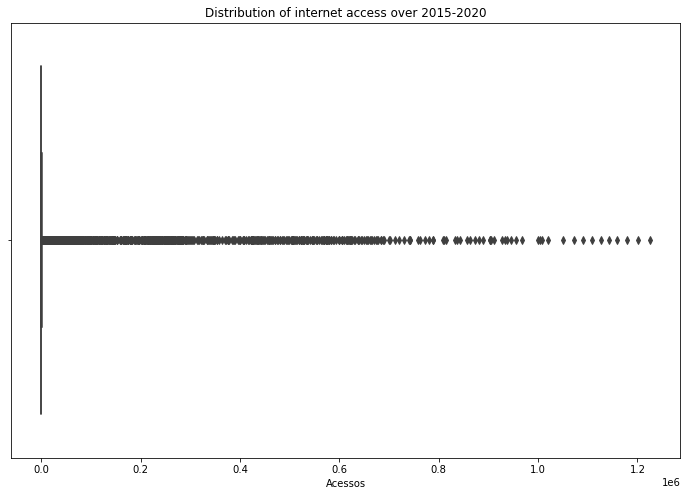

In [277]:
boxplot_Acessos = plotchart(drop_duplit['Acessos'])
boxplot_Acessos

In term of rentability, the more Internet access the better. I will drop the rows with fewer than 100,000 internet accesses. 

In [278]:
drop_duplit = drop_duplit.drop(drop_duplit[(drop_duplit['Acessos'] < 100000)].index)

In [279]:
drop_duplit

,Ano,Mês,Empresa,Município,Faixa de Velocidade,Tecnologia,Acessos
2382887,2015,1,VIVO,São Paulo,512kbps a 2Mbps,xDSL,684175
2410398,2015,1,CLARO,São Paulo,512kbps a 2Mbps,Cable Modem,268494
2412232,2015,1,CLARO,São Paulo,12Mbps a 34Mbps,Cable Modem,161410
2413582,2015,1,CLARO,Campinas,2Mbps a 12Mbps,Cable Modem,121274
2417466,2015,1,CLARO,São Paulo,2Mbps a 12Mbps,Cable Modem,1004614
...,...,...,...,...,...,...,...
87652,2020,12,CLARO,Campinas,> 34Mbps,HFC,145494
98061,2020,12,CLARO,São Paulo,2Mbps a 12Mbps,HFC,123499
98341,2020,12,CLARO,Sorocaba,> 34Mbps,HFC,103783
98485,2020,12,CLARO,São Paulo,> 34Mbps,HFC,1224902


In [287]:
#Inspect the columns

print(drop_duplit['Ano'].unique())
print(drop_duplit['Mês'].unique())
print(drop_duplit['Empresa'].unique())
print(drop_duplit['Tecnologia'].unique())

[2015 2016 2017 2018 2019 2020]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
['VIVO' 'CLARO' 'TIM']
['xDSL' 'Cable Modem' 'Fibra' 'HFC']


Count of outliers  14
Quantitative data  count    5.170000e+02
mean     3.769935e+05
std      2.352242e+05
min      1.000520e+05
25%      2.141410e+05
50%      2.814670e+05
75%      5.229960e+05
max      1.224902e+06
Name: Acessos, dtype: float64
Missing values  0
% of Missing values  0.0


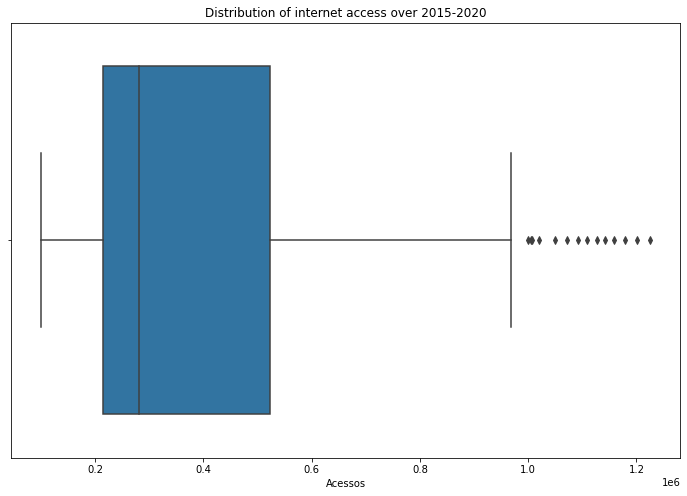

In [288]:
#Find the number of outliers and plot a boxplot

boxplot_Acessos = plotchart(drop_duplit['Acessos'])
boxplot_Acessos

# CATEGORICAL VARIABLE ANALYSIS

# Univariate analysis

First let's start with an univariate analysis of each categorical analysis

Below I define the following function:

1. catvarial - prints the frequency of the categorical column and the histogram of the categorial column

In [25]:
#define a function to analyze the categorical column

#catvarial function prints the frequency of the categorical column
def catvarial(column):
    print('Quantitative data ')
    print(format(column.value_counts()))
    fig, ax = plt.subplots(1,1,figsize=(12,8))
    ax = sns.histplot(x = column)
    
    

Quantitative data 
CLARO    261
VIVO     195
TIM       61
Name: Empresa, dtype: int64


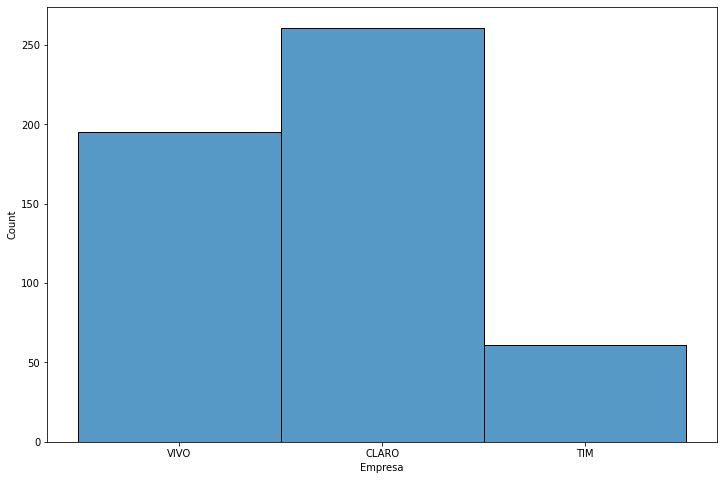

In [291]:
cat_empr = catvarial(drop_duplit['Empresa'])

Quantitative data 
São Paulo    487
Campinas      27
Sorocaba       3
Name: Município, dtype: int64


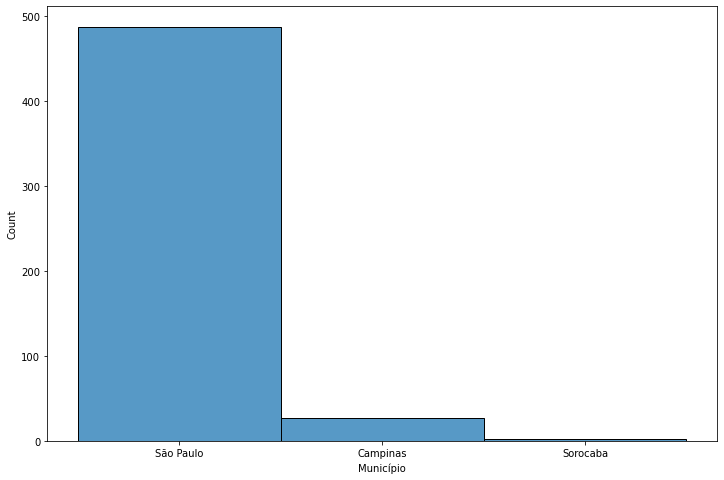

In [292]:
cat_muni = catvarial(drop_duplit['Município'])

Quantitative data 
> 34Mbps           212
2Mbps a 12Mbps     127
512kbps a 2Mbps    115
12Mbps a 34Mbps     63
Name: Faixa de Velocidade, dtype: int64


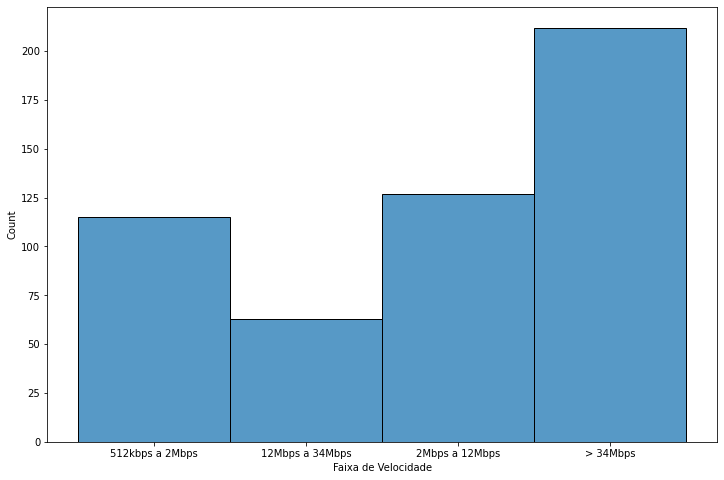

In [293]:
#call catvarial on Internet speed
cat_faixa_velocidade = catvarial(drop_duplit['Faixa de Velocidade'])

Quantitative data 
xDSL           188
Cable Modem    167
HFC             94
Fibra           68
Name: Tecnologia, dtype: int64


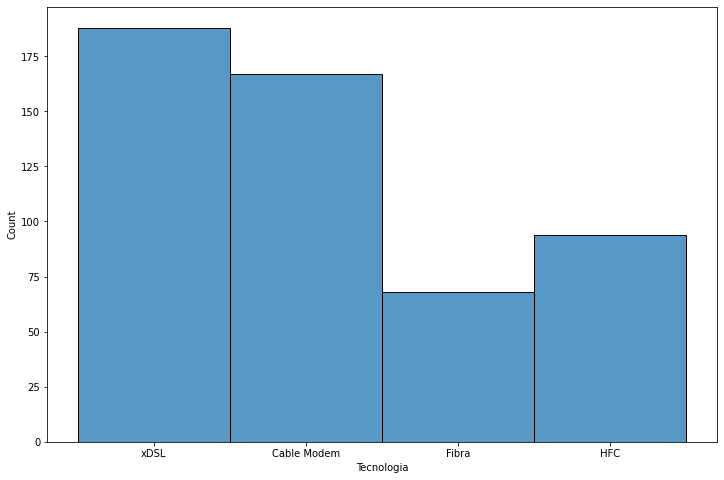

In [294]:
#call catvarial on internet technology
cat_tech = catvarial(drop_duplit['Tecnologia'])

# Multivariate analysis

Let's establish the following relationship among all variables

In [295]:
#define a function to display internet acess against other parameters
def multivarial(column):
    Access_multi = drop_duplit['Acessos'].groupby(column).sum().sort_values(ascending = True)
    f, ax = plt.subplots(1, 1, figsize=(15, 8))
    ax = sns.barplot(x = Access_multi.index, y = Access_multi)
    plt.title('Distribution of internet access over 2015-2020')

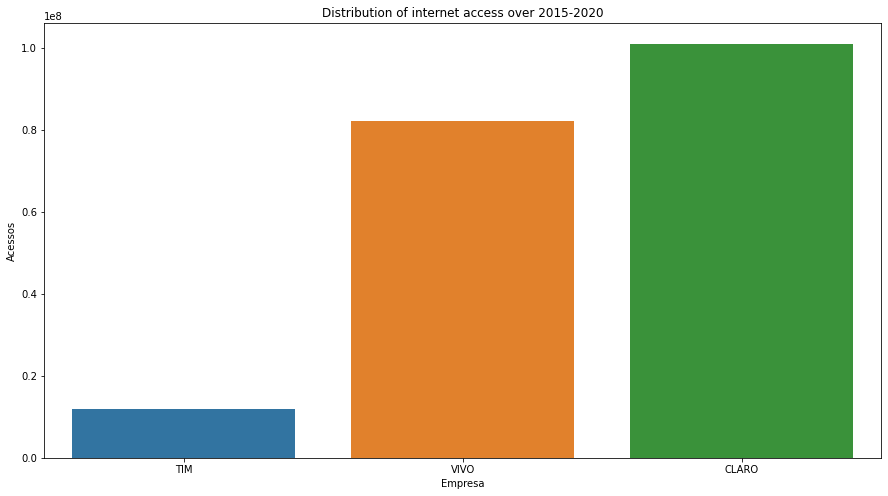

In [296]:
Access_per_empresa = multivarial(drop_duplit['Empresa'])

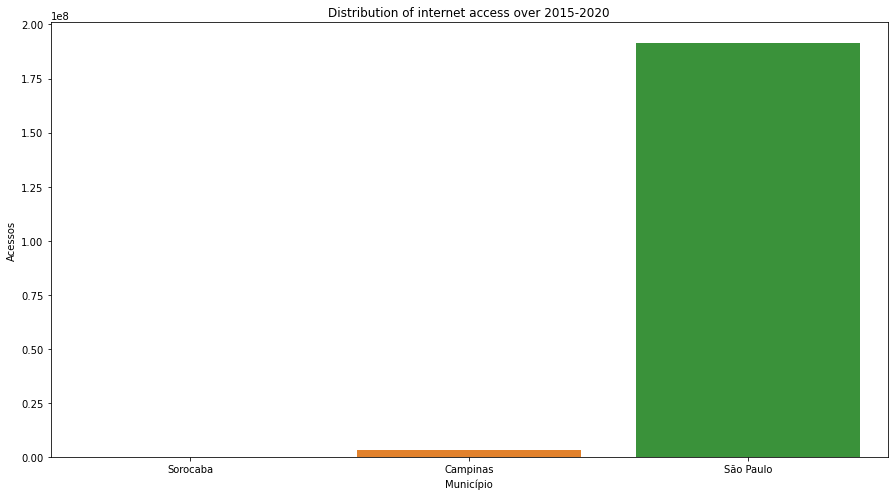

In [297]:
Access_per_municipio = multivarial(drop_duplit['Município'])

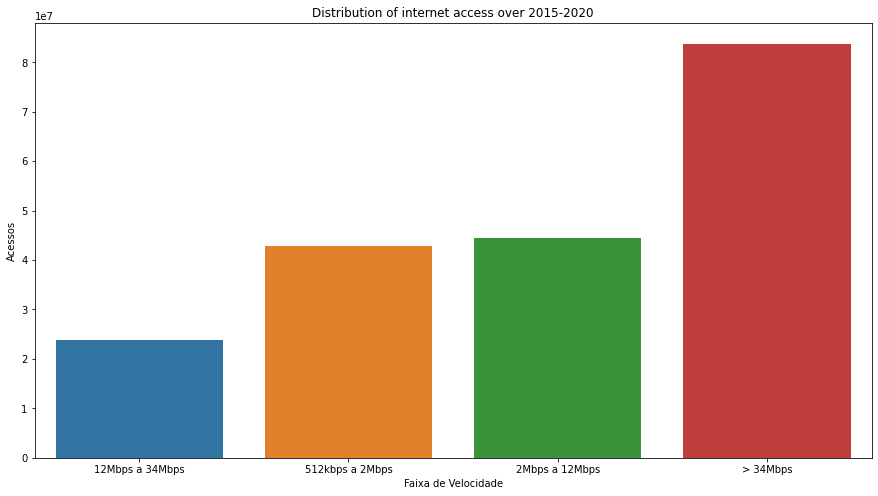

In [298]:
Access_per_faixa = multivarial(drop_duplit['Faixa de Velocidade'])

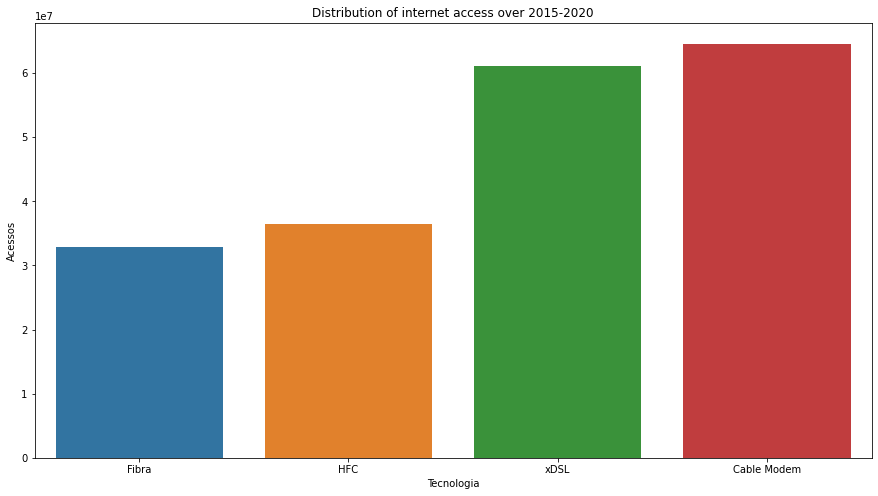

In [299]:
Access_per_tech = multivarial(drop_duplit['Tecnologia'])

Now let's perform the multivariate analysis on the categorical columns only. 

In [300]:
def multicat(colum1, colum2):
    f, ax = plt.subplots(1, 1, figsize=(15, 8))
    ax = sns.countplot(x = colum1 , hue = colum2, data = drop_duplit)

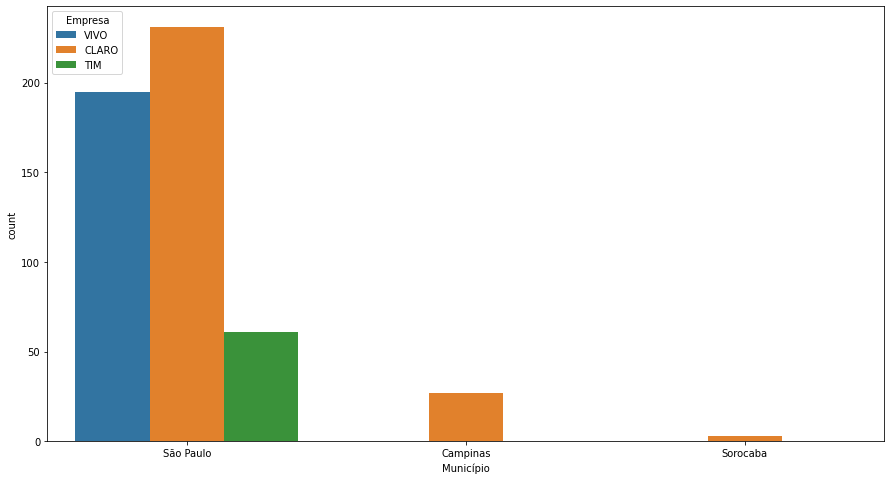

In [301]:
muni_empr = multicat('Município', 'Empresa')

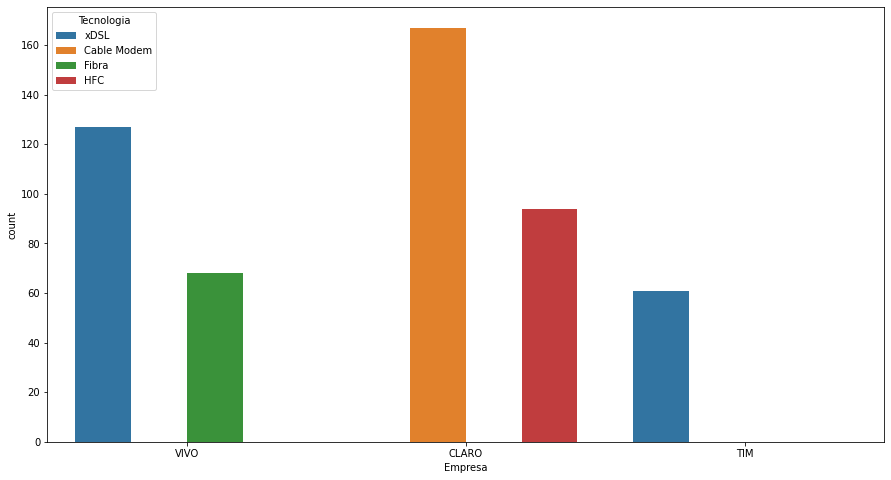

In [302]:
empr_tech = multicat('Empresa', 'Tecnologia')

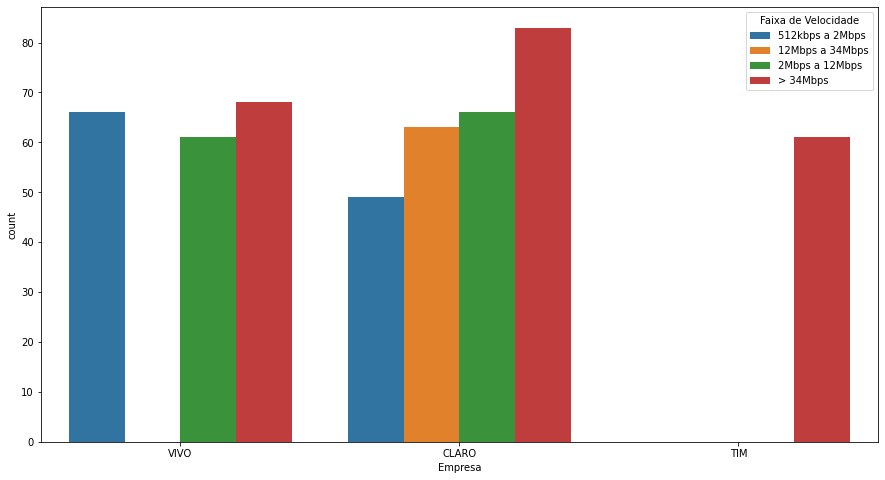

In [303]:
empr_faixa = multicat('Empresa', 'Faixa de Velocidade')

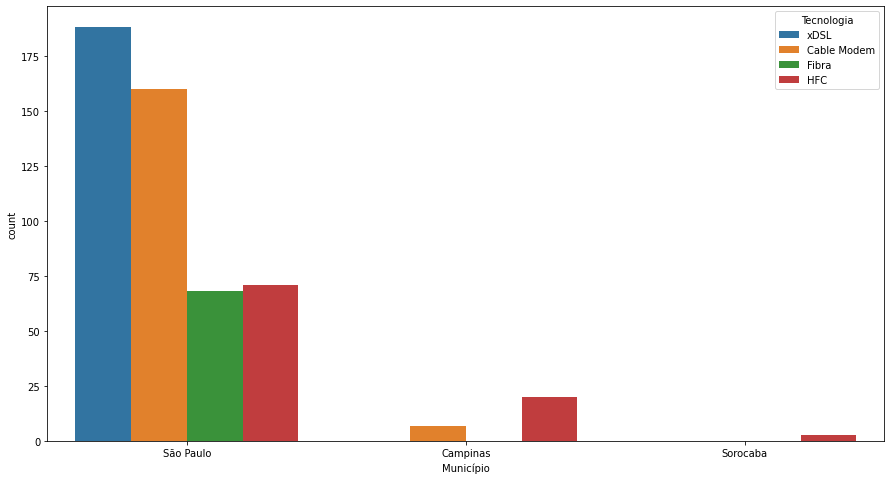

In [304]:
muni_techn = multicat('Município', 'Tecnologia')

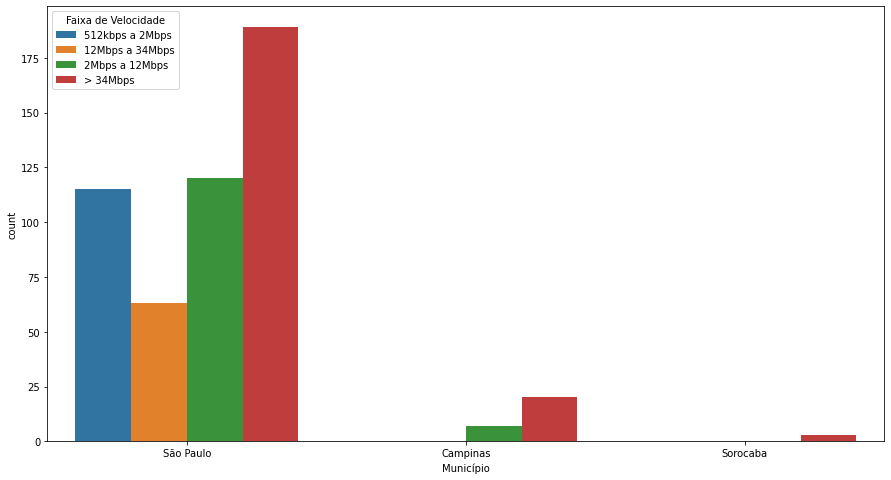

In [305]:
muni_faixa = multicat('Município', 'Faixa de Velocidade')

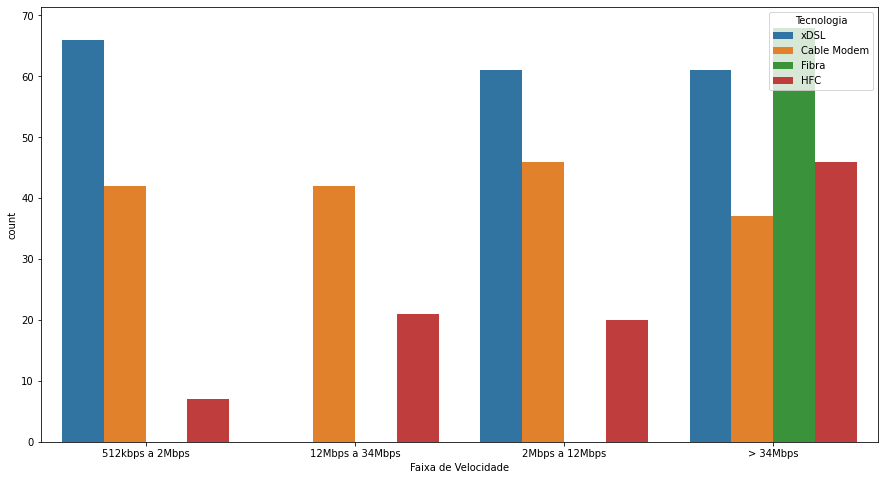

In [306]:
faixa_tecnh = multicat('Faixa de Velocidade', 'Tecnologia')

# HYPOTHESIS TESTING

2 Sample T-test 

Does the access to Internet changes from one city to another ?

H0: The access to internet in São Paulo and in Campinas is the same

H1: The access to internet in São Paulo and in Campinas is not the same

In [309]:
x = np.array(drop_duplit[drop_duplit.Município == 'São Paulo'].Acessos) 
y = np.array(drop_duplit[drop_duplit.Município == 'Campinas'].Acessos)
t, p_value  = stats.ttest_ind(x,y, axis = 0) 
if p_value < 0.05:  # Setting our significance level at 5%
    print('Rejecting Null Hypothesis. That means the access to internet in São Paulo and in Campinas is not the same')
else:
    print('Fail to Reject Null Hypothesis. That means the access to internet in São Paulo and in Campinasis the same')

Rejecting Null Hypothesis. That means the access to internet in São Paulo and in Campinas is not the same


2 Sample T-test 

Does the access to Internet changes from one internet provider to another ?

H0: The access to internet with CLARO and VIVO is the same

H1: The access to internet with CLARO and VIVO is not the same

In [310]:
x = np.array(drop_duplit[drop_duplit.Empresa == 'CLARO'].Acessos) 
y = np.array(drop_duplit[drop_duplit.Empresa == 'VIVO'].Acessos)
t, p_value_2  = stats.ttest_ind(x,y, axis = 0) 
if p_value_2 < 0.05:  # Setting our significance level at 5%
    print('Rejecting Null Hypothesis. That means that the access to internet with CLARO and VIVO is not the same')
else:
    print('Fail to Reject Null Hypothesis. That means the access to internet with CLARO and VIVO is the same')

Fail to Reject Null Hypothesis. That means the access to internet with CLARO and VIVO is the same


2 Sample T-test 

Does the access to Internet changes with the internet speed range ?

H0: The access to internet with a speed ranges of 2Mbps-12Mbps is the same with one of 512kbps-2Mbps

H1: The access to internet with a speed ranges of 2Mbps-12Mbps is not the same with one of 512kbps-2Mbps

In [311]:
x = np.array(drop_duplit[drop_duplit['Faixa de Velocidade'] == '2Mbps a 12Mbps'].Acessos) 
y = np.array(drop_duplit[drop_duplit['Faixa de Velocidade'] == '512kpbs a 2Mbps'].Acessos)
t, p_value_3  = stats.ttest_ind(x,y, axis = 0) 
if p_value_3 < 0.05:  # Setting our significance level at 5%
    print('Rejecting Null Hypothesis.')
else:
    print('Fail to Reject Null Hypothesis')

Fail to Reject Null Hypothesis


2 Sample T-test 

Does the access to Internet changes with the internet technology ?

H0: The access to internet with a xDSL technology is the same with Optical Fiber , "Fibra"

H0: The access to internet with a xDSL technology is not the same with Optical Fiber , "Fibra"

In [312]:
x = np.array(drop_duplit[drop_duplit['Tecnologia'] == 'xDSL'].Acessos) 
y = np.array(drop_duplit[drop_duplit['Tecnologia'] == 'Fibra'].Acessos)
t, p_value_4  = stats.ttest_ind(x,y, axis = 0) 
if p_value_4 < 0.05:  # Setting our significance level at 5%
    print('Rejecting Null Hypothesis.')
else:
    print('Fail to Reject Null Hypothesis.')

Rejecting Null Hypothesis.


# HEATMAP

In [313]:
drop_sort = drop_duplit.copy()
drop_sort

,Ano,Mês,Empresa,Município,Faixa de Velocidade,Tecnologia,Acessos
2382887,2015,1,VIVO,São Paulo,512kbps a 2Mbps,xDSL,684175
2410398,2015,1,CLARO,São Paulo,512kbps a 2Mbps,Cable Modem,268494
2412232,2015,1,CLARO,São Paulo,12Mbps a 34Mbps,Cable Modem,161410
2413582,2015,1,CLARO,Campinas,2Mbps a 12Mbps,Cable Modem,121274
2417466,2015,1,CLARO,São Paulo,2Mbps a 12Mbps,Cable Modem,1004614
...,...,...,...,...,...,...,...
87652,2020,12,CLARO,Campinas,> 34Mbps,HFC,145494
98061,2020,12,CLARO,São Paulo,2Mbps a 12Mbps,HFC,123499
98341,2020,12,CLARO,Sorocaba,> 34Mbps,HFC,103783
98485,2020,12,CLARO,São Paulo,> 34Mbps,HFC,1224902


In [314]:
drop_sort[['Empresa', 'Município','Faixa de Velocidade', 'Tecnologia']] = drop_sort[['Empresa', 'Município','Faixa de Velocidade', 'Tecnologia']].astype('category')
drop_sort.dtypes

Ano                       int64
Mês                       int64
Empresa                category
Município              category
Faixa de Velocidade    category
Tecnologia             category
Acessos                   int64
dtype: object

In [315]:
label = LabelEncoder()
label.fit(drop_sort.Empresa)
drop_sort.Empresa = label.transform(drop_sort.Empresa)
label.fit(drop_sort['Município'])
drop_sort['Município'] = label.transform(drop_sort['Município'])
label.fit(drop_sort['Faixa de Velocidade'])
drop_sort['Faixa de Velocidade'] = label.transform(drop_sort['Faixa de Velocidade'])
label.fit(drop_sort['Tecnologia'])
drop_sort['Tecnologia'] = label.transform(drop_sort['Tecnologia'])
drop_sort.dtypes

Ano                    int64
Mês                    int64
Empresa                int32
Município              int32
Faixa de Velocidade    int32
Tecnologia             int32
Acessos                int64
dtype: object

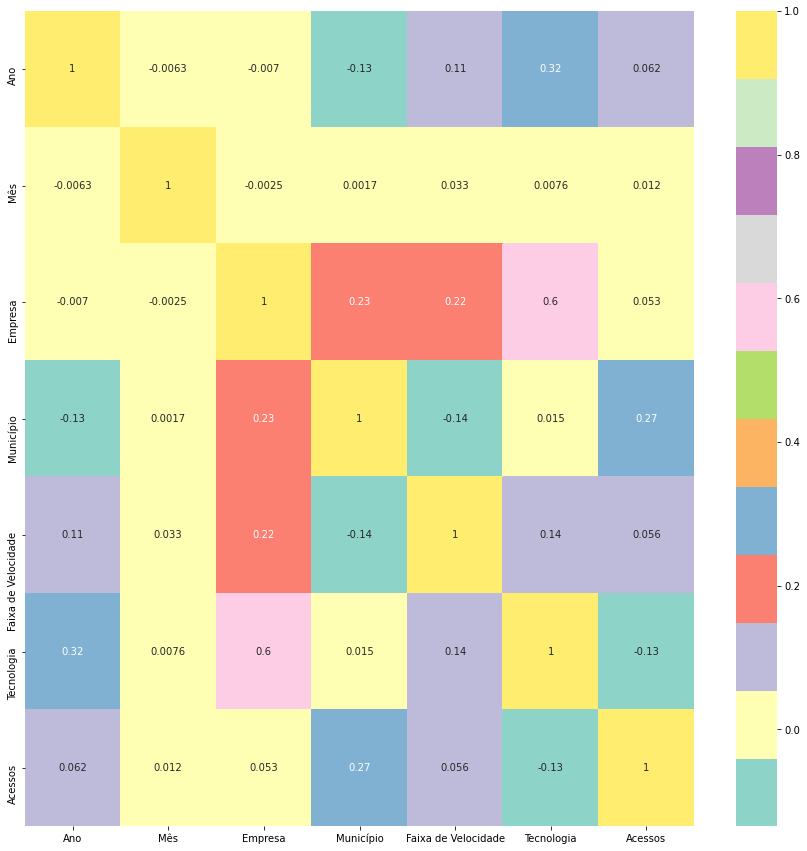

In [320]:
#Correlation matrix
f, ax = plt.subplots(1, 1, figsize=(15, 15))
ax = sns.heatmap(drop_sort.corr(), annot=True, cmap='Set3')

Remove multicollinearity

In [321]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [322]:
#Remove multicollinearity
#create a list of feature names

independent_variables = ['Empresa', 'Município', 'Faixa de Velocidade', 'Tecnologia']
X = drop_sort[independent_variables]
y = drop_sort['Acessos']

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)


,VIF Factor,features
0,3.1,Empresa
1,4.0,Município
2,3.6,Faixa de Velocidade
3,3.7,Tecnologia


# DECISION TREE MODELING

In [323]:
df=drop_duplit.copy()
df

,Ano,Mês,Empresa,Município,Faixa de Velocidade,Tecnologia,Acessos
2382887,2015,1,VIVO,São Paulo,512kbps a 2Mbps,xDSL,684175
2410398,2015,1,CLARO,São Paulo,512kbps a 2Mbps,Cable Modem,268494
2412232,2015,1,CLARO,São Paulo,12Mbps a 34Mbps,Cable Modem,161410
2413582,2015,1,CLARO,Campinas,2Mbps a 12Mbps,Cable Modem,121274
2417466,2015,1,CLARO,São Paulo,2Mbps a 12Mbps,Cable Modem,1004614
...,...,...,...,...,...,...,...
87652,2020,12,CLARO,Campinas,> 34Mbps,HFC,145494
98061,2020,12,CLARO,São Paulo,2Mbps a 12Mbps,HFC,123499
98341,2020,12,CLARO,Sorocaba,> 34Mbps,HFC,103783
98485,2020,12,CLARO,São Paulo,> 34Mbps,HFC,1224902


In [324]:
df = df[(df['Tecnologia']=='Fibra') | (df['Tecnologia']=='Cable Modem') | (df['Tecnologia']=='HFC') | (df['Tecnologia']=='xDSL') ]
df = df.copy()

In [325]:
df.loc[df['Acessos'] < 500000, 'Survey'] = 0
df.loc[df['Acessos'] >= 500000, 'Survey'] = 1

In [326]:
df['Survey'] = df['Survey'].astype(int)
df

,Ano,Mês,Empresa,Município,Faixa de Velocidade,Tecnologia,Acessos,Survey
2382887,2015,1,VIVO,São Paulo,512kbps a 2Mbps,xDSL,684175,1
2410398,2015,1,CLARO,São Paulo,512kbps a 2Mbps,Cable Modem,268494,0
2412232,2015,1,CLARO,São Paulo,12Mbps a 34Mbps,Cable Modem,161410,0
2413582,2015,1,CLARO,Campinas,2Mbps a 12Mbps,Cable Modem,121274,0
2417466,2015,1,CLARO,São Paulo,2Mbps a 12Mbps,Cable Modem,1004614,1
...,...,...,...,...,...,...,...,...
87652,2020,12,CLARO,Campinas,> 34Mbps,HFC,145494,0
98061,2020,12,CLARO,São Paulo,2Mbps a 12Mbps,HFC,123499,0
98341,2020,12,CLARO,Sorocaba,> 34Mbps,HFC,103783,0
98485,2020,12,CLARO,São Paulo,> 34Mbps,HFC,1224902,1


Modeling the decision tree classifier

In [327]:
inputs = df.drop(columns=['Acessos', 'Survey'])
target = df['Survey']

In [328]:
inputs[['Empresa', 'Município','Faixa de Velocidade', 'Tecnologia']] = inputs[['Empresa', 'Município','Faixa de Velocidade', 'Tecnologia']].astype('category')
inputs.dtypes

Ano                       int64
Mês                       int64
Empresa                category
Município              category
Faixa de Velocidade    category
Tecnologia             category
dtype: object

In [329]:
label = LabelEncoder()
label.fit(inputs.Empresa)
inputs.Empresa = label.transform(inputs.Empresa)
label.fit(inputs['Município'])
inputs['Município'] = label.transform(inputs['Município'])
label.fit(inputs['Faixa de Velocidade'])
inputs['Faixa de Velocidade'] = label.transform(inputs['Faixa de Velocidade'])
label.fit(inputs['Tecnologia'])
inputs['Tecnologia'] = label.transform(inputs['Tecnologia'])
inputs.dtypes

Ano                    int64
Mês                    int64
Empresa                int32
Município              int32
Faixa de Velocidade    int32
Tecnologia             int32
dtype: object

In [330]:
x_train = inputs.iloc[:-30]
x_test = inputs.iloc[-30:]
y_train = target.iloc[:-30]
y_test = target.iloc[-30:]

In [331]:
from sklearn import tree

In [332]:
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [333]:
from sklearn.metrics import accuracy_score

In [334]:
y_pred = model.predict(x_test)

In [337]:
print('The accuracy of the model is ', accuracy_score(y_test, y_pred))

The accuracy of the model is  1.0


# OPERATIONAL KEY PERFORMANCE INDEX ANALYSIS

# Market Share of Internet access

In [338]:
kpi_acesso = df.sort_values(by=['Ano', 'Mês']).copy()

In [339]:
# Let's add a column 'Região' which represents the brazilian regions. 
T1 = [1, 2, 3]
T2 = [4, 5, 6]
T3 = [7, 8, 9]
T4 = [10, 11, 12]

kpi_acesso['Trimestre'] = ["T1" if x in T1 else
                         ("T2" if x in T2 else 
                          ('T3' if x in T3 else
                          'T4')) for x in kpi_acesso['Mês']]

In [340]:
kpi_trim = kpi_acesso.groupby(['Empresa']).sum()
soma = kpi_trim['Acessos'].sum()
kpi_trim['Market Share'] = [ (x  * 100)/ soma  for x in kpi_trim['Acessos']]
kpi_trim = kpi_trim.drop(columns=['Ano', 'Mês', 'Survey', 'Acessos'])
kpi_trim

,Market Share
Empresa,
CLARO,51.804249
TIM,6.106670
VIVO,42.089081


# Penetration of Internet access

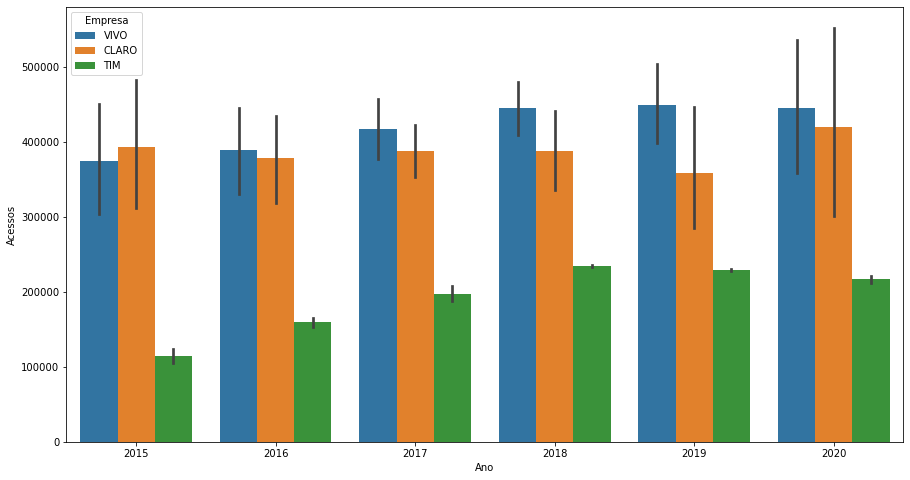

In [341]:
f, ax = plt.subplots(1, 1, figsize=(15, 8))
ax = sns.barplot(x = kpi_acesso['Ano'], y = kpi_acesso['Acessos'], hue = kpi_acesso['Empresa'])

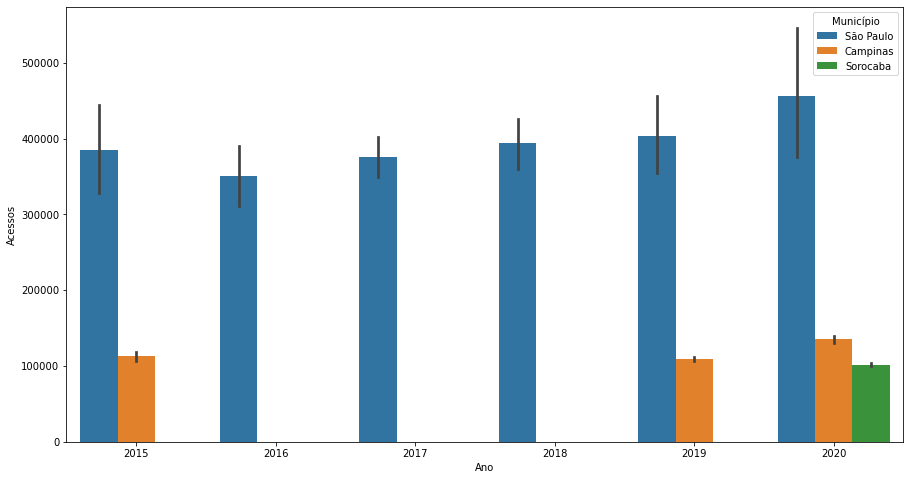

In [342]:
f, ax = plt.subplots(1, 1, figsize=(15, 8))
ax = sns.barplot(x = kpi_acesso['Ano'], y = kpi_acesso['Acessos'], hue = kpi_acesso['Município'])